In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/magisterka

/content/drive/My Drive/magisterka


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from enum import Enum, auto
import json

import tensorflow as tf
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from scripts.data_processing.market_data_processing import prepare_market_data_for_model
from model_training.price_model_training import train_price_prediction_model, ModelType, LossFunction
from model_training.price_model_validation import *
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [5]:
np.random.seed(120)
random.seed(120)

In [6]:
base_path = '/content/drive/My Drive/magisterka/data/market_data'

In [7]:
X, y = prepare_market_data_for_model("eth_merged.csv", base_path, horizon=4*12)

In [8]:
X

,price_over_ema4h,price_over_ema2h,volatility_4h,volatility_wh,volume_z,s_t,log_return_t-1
timestamp,,,,,,,
2025-04-12 00:05:00+00:00,-0.001266,-0.000558,0.001403,0.002159,-0.537620,0.002159,-0.001262
2025-04-12 00:10:00+00:00,-0.002423,-0.001673,0.001412,0.002160,-0.520829,0.002160,0.001334
2025-04-12 00:15:00+00:00,-0.001047,-0.000314,0.001422,0.002152,-0.258105,0.002152,-0.001578
2025-04-12 00:20:00+00:00,-0.002516,-0.001739,0.001440,0.002154,-0.556829,0.002154,-0.000416
2025-04-12 00:25:00+00:00,-0.002812,-0.001983,0.001397,0.002153,-0.466902,0.002153,0.000338
...,...,...,...,...,...,...,...
2025-06-06 19:35:00+00:00,-0.003104,-0.002617,0.001422,0.002159,-0.365462,0.002159,0.000407
2025-06-06 19:40:00+00:00,-0.002589,-0.002035,0.001383,0.002156,-0.623879,0.002156,0.000905
2025-06-06 19:45:00+00:00,-0.001617,-0.001041,0.001365,0.002156,-0.697097,0.002156,-0.000007


In [9]:
split = TimeSeriesSplit(n_splits=5)

# LSTM - trenowanie

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - loss: 0.7628 - val_loss: 0.5114 - learning_rate: 0.0010
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.6677 - val_loss: 0.4868 - learning_rate: 0.0010
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.6274 - val_loss: 0.4905 - learning_rate: 0.0010
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.6109 - val_loss: 0.4840 - learning_rate: 0.0010
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6091 - val_loss: 0.4943 - learning_rate: 0.0010
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6219 - val_loss: 0.4923 - learning_rate: 0.0010
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6031 - val_loss: 0.4956 - learning_rate: 5.0000e-04
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5904 - val_loss: 0.4963 - learning_rate: 5.0000e-04
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6035 - val_loss: 0.4961 - learning_rate: 2.5000e-0

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


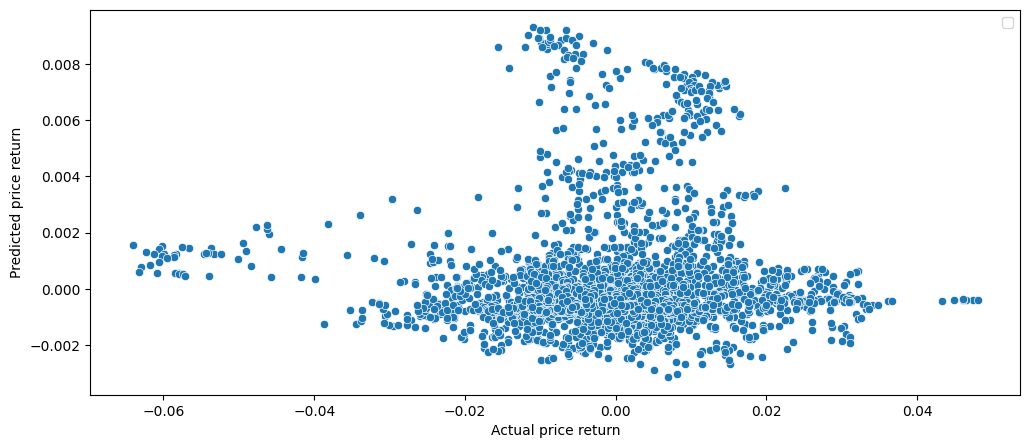

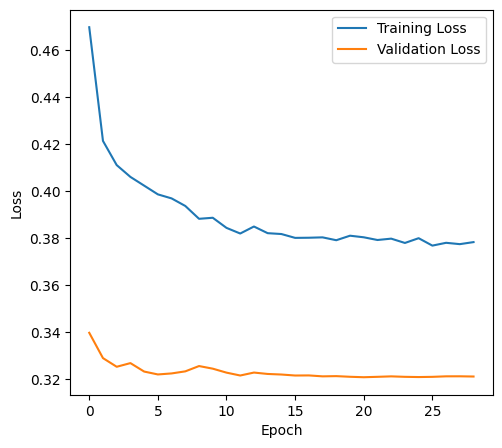

=== Cross-validation (validation folds) ===
mean CV MSE: 0.00023846482508815825
mean CV MAE: 0.011129324324429035
mean CV DA: 0.5216722729456992
mean CV SR: 0.06938543642272502
mean CV R^2: -0.062472403049468994
mean CV Pearson correlation: 0.08042637258768082


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


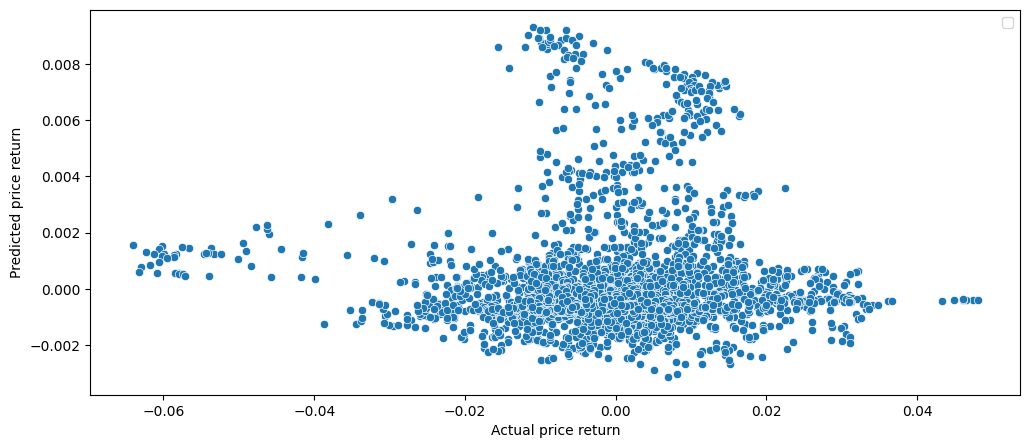

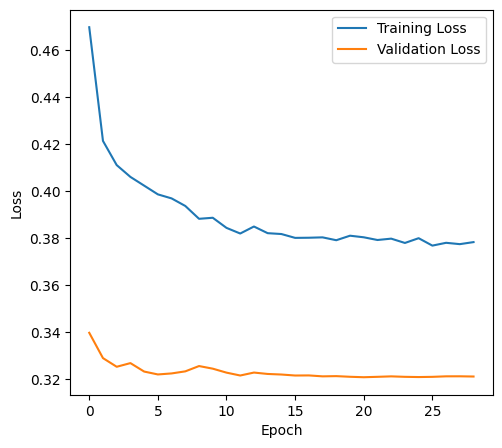

successfully saved training's output to lstm_eth_scores_1_2.json


In [10]:
lstm_1_scores, lstm_1_history = train_price_prediction_model(X, y, ModelType.LSTM, split, "lstm_eth_scores_1_2.json", dropout=0.5, num_neurons=32, batch_size=128, seq_length=64, learning_rate=0.001, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.7646 - val_loss: 0.5520 - learning_rate: 0.0010
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.6808 - val_loss: 0.5565 - learning_rate: 0.0010
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.6912 - val_loss: 0.5210 - learning_rate: 0.0010
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6267 - val_loss: 0.5376 - learning_rate: 0.0010
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6378 - val_loss: 0.5368 - learning_rate: 0.0010
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6301 - val_loss: 0.5300 - learning_rate: 5.0000e-04
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6098 - val_loss: 0.5413 - learning_rate: 5.0000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6075 - val_loss: 0.5296 - learning_rate: 2.5000e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5989 - val_loss: 0.5260 - learning_rate: 2.500

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


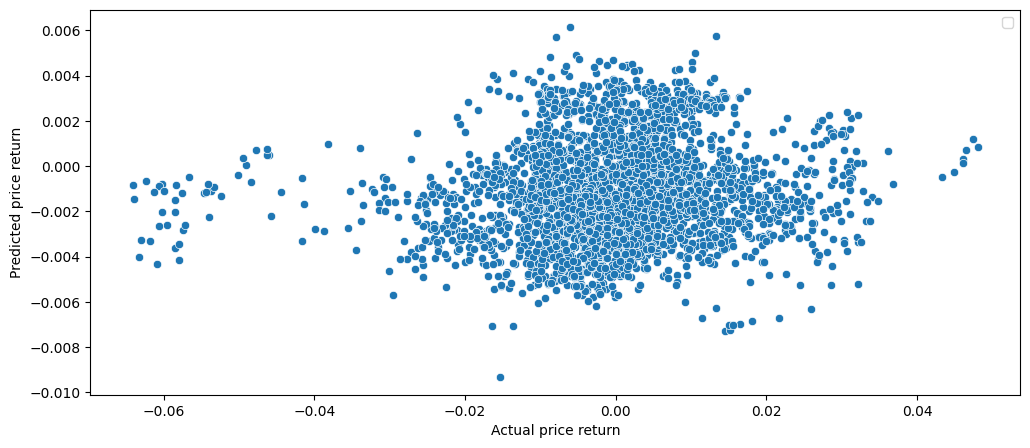

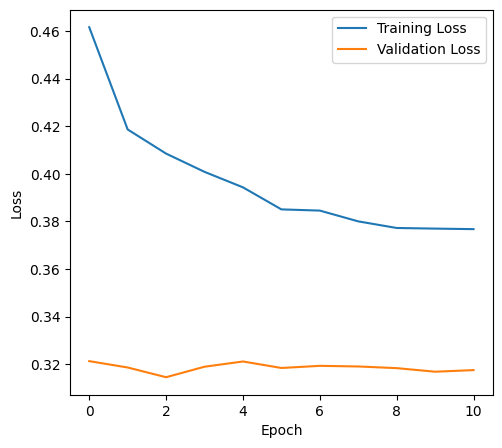

=== Cross-validation (validation folds) ===
mean CV MSE: 0.00023881508968770504
mean CV MAE: 0.011119991540908813
mean CV DA: 0.509178279673234
mean CV SR: 0.02334375392697993
mean CV R^2: -0.06111397743225098
mean CV Pearson correlation: 0.1072586178779602


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


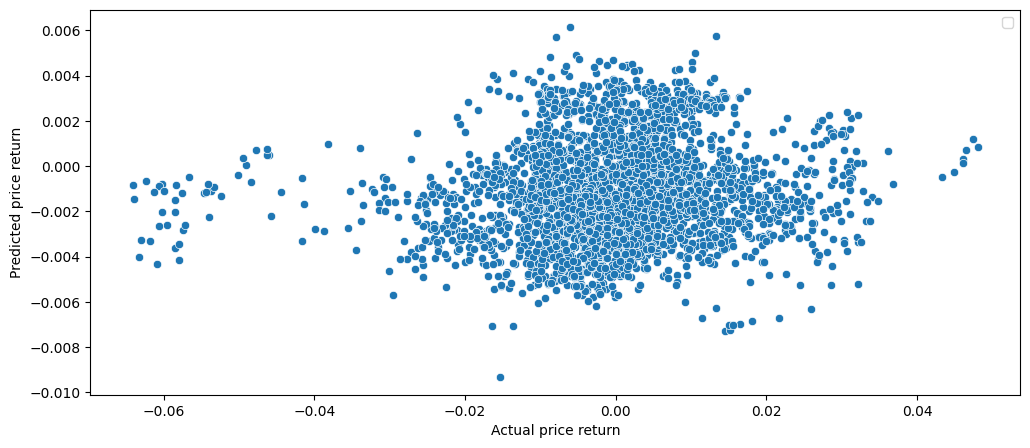

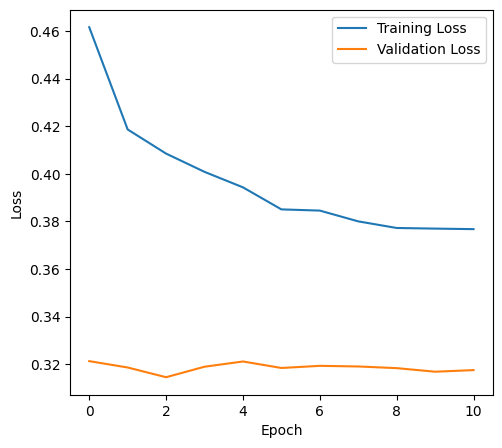

successfully saved training's output to lstm_eth_scores_2_2.json


In [11]:
lstm_2_scores, lstm_2_history = train_price_prediction_model(X, y, ModelType.LSTM, split, "lstm_eth_scores_2_2.json", dropout=0.5, num_neurons=32, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.001, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.8439 - val_loss: 0.6749 - learning_rate: 0.0020
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7343 - val_loss: 0.5981 - learning_rate: 0.0020
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6577 - val_loss: 0.4854 - learning_rate: 0.0020
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6528 - val_loss: 0.5578 - learning_rate: 0.0020
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6803 - val_loss: 0.5151 - learning_rate: 0.0020
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6143 - val_loss: 0.5131 - learning_rate: 0.0010
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6420 - val_loss: 0.5005 - learning_rate: 0.0010
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.6099 - val_loss: 0.4944 - learning_rate: 5.0000e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.5894 - val_loss: 0.5079 - learning_rate: 5.0000e-04
Ep

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


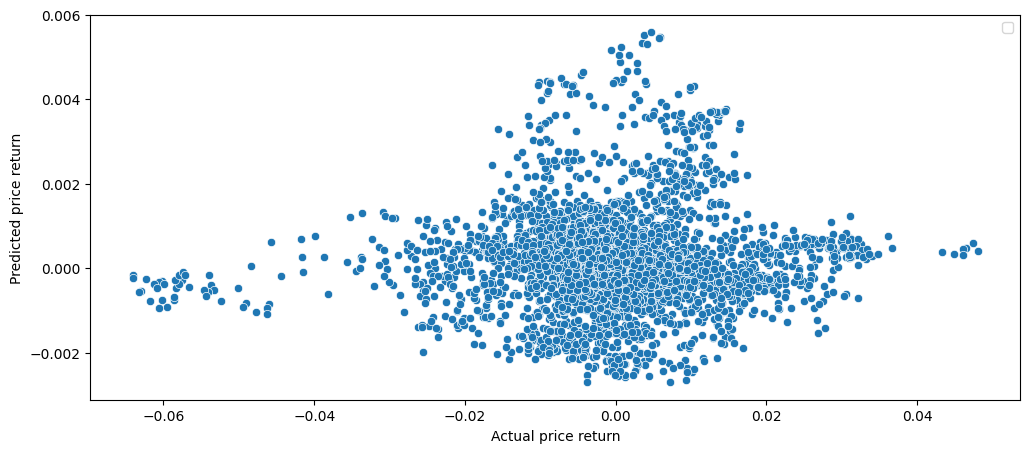

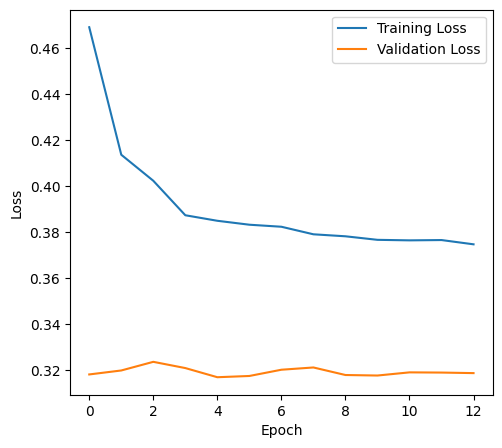

=== Cross-validation (validation folds) ===
mean CV MSE: 0.00023414159659296274
mean CV MAE: 0.011017119511961937
mean CV DA: 0.5336857280153773
mean CV SR: 0.08425777603980114
mean CV R^2: -0.03633612394332886
mean CV Pearson correlation: 0.10759861767292023


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


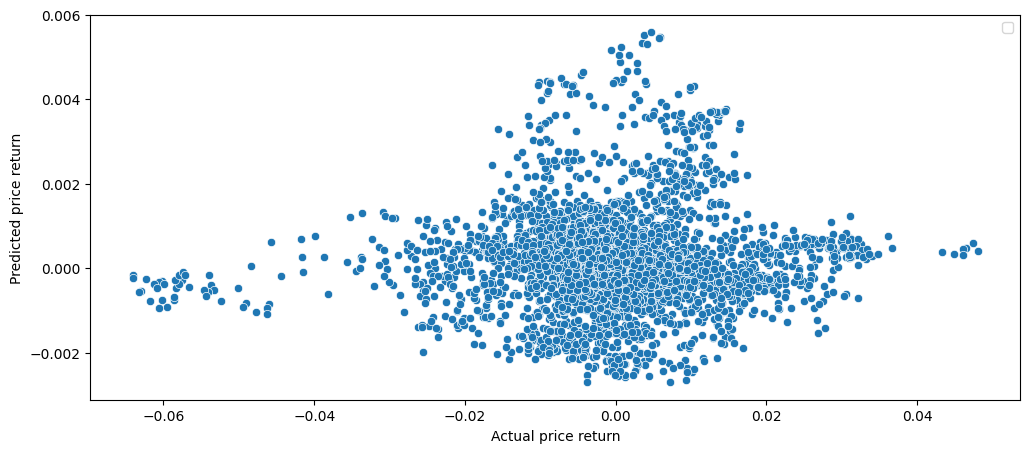

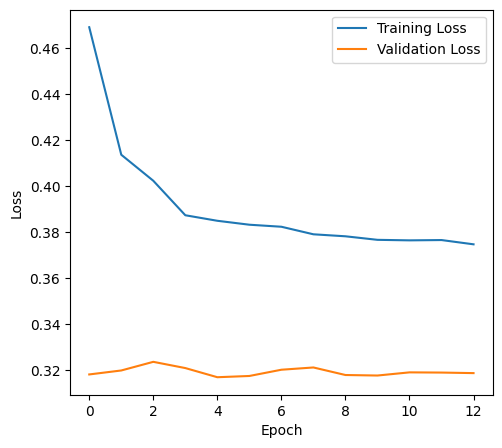

successfully saved training's output to lstm_eth_scores_3_2.json


In [12]:
lstm_3_scores, lstm_3_history = train_price_prediction_model(X, y, ModelType.LSTM, split, "lstm_eth_scores_3_2.json", dropout=0.7, num_neurons=48, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.002, epochs=100, loss_funtion=LossFunction.HUBER)

# GRU - trenowanie

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.7311 - val_loss: 0.4828 - learning_rate: 0.0010
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.6552 - val_loss: 0.4515 - learning_rate: 0.0010
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.6326 - val_loss: 0.4803 - learning_rate: 0.0010
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.6384 - val_loss: 0.4721 - learning_rate: 0.0010
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.6305 - val_loss: 0.4715 - learning_rate: 5.0000e-04
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.6104 - val_loss: 0.4675 - learning_rate: 5.0000e-04
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.6084 - val_loss: 0.4659 - learning_rate: 2.5000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.6258 - val_loss: 0.4679 - learning_rate: 2.5000e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.5878 - val_loss: 0.4685 - learning_rate: 1

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


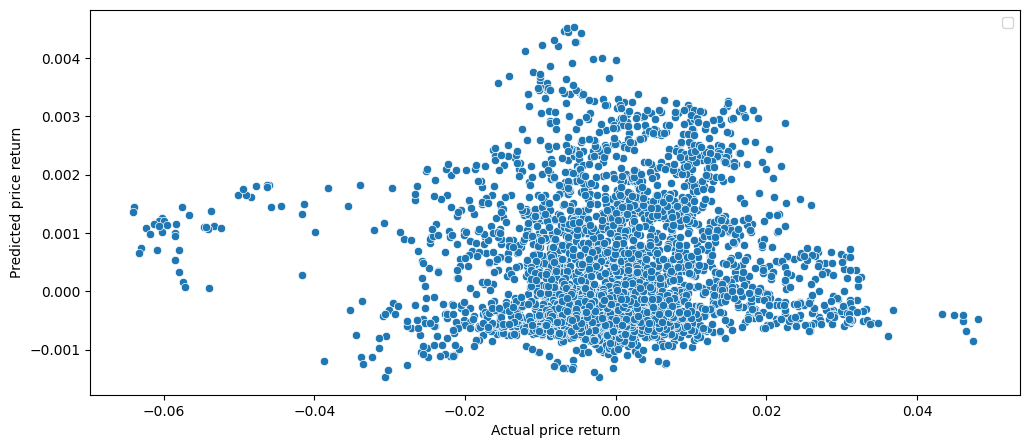

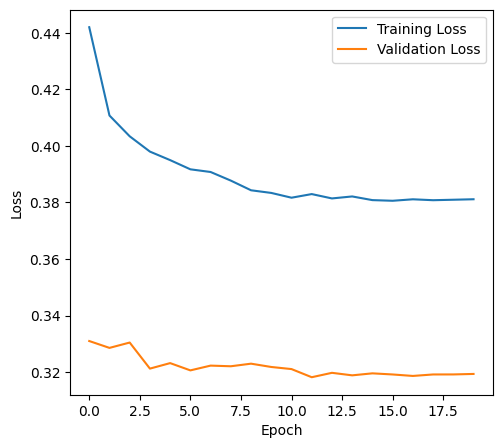

=== Cross-validation (validation folds) ===
mean CV MSE: 0.00023413830786012113
mean CV MAE: 0.010940872132778168
mean CV DA: 0.5412782316194138
mean CV SR: 0.09158065561400072
mean CV R^2: -0.034215474128723146
mean CV Pearson correlation: 0.11432337760925293


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


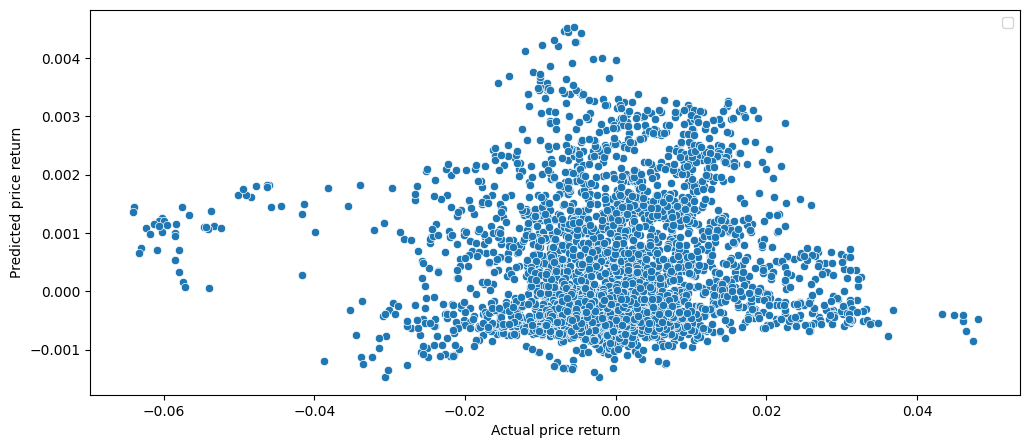

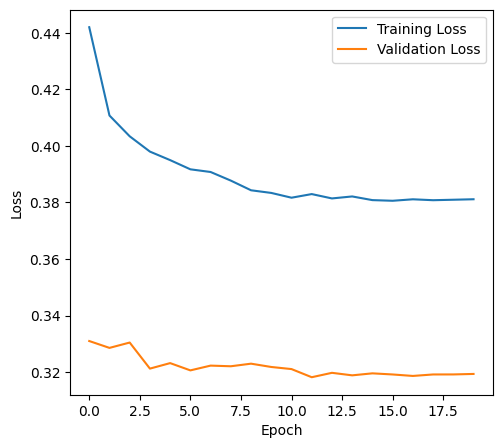

successfully saved training's output to gru_eth_scores_1_2.json


In [13]:
gru_1_scores, gru_1_history = train_price_prediction_model(X, y, ModelType.GRU, split, "gru_eth_scores_1_2.json", dropout=0.7, num_neurons=32, batch_size=64, seq_length=64, learning_rate=0.001, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.7382 - val_loss: 0.5531 - learning_rate: 0.0010
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7044 - val_loss: 0.5336 - learning_rate: 0.0010
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6823 - val_loss: 0.5113 - learning_rate: 0.0010
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6471 - val_loss: 0.5356 - learning_rate: 0.0010
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6725 - val_loss: 0.5257 - learning_rate: 0.0010
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.6453 - val_loss: 0.5057 - learning_rate: 5.0000e-04
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.6120 - val_loss: 0.5122 - learning_rate: 5.0000e-04
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.6291 - val_loss: 0.5046 - learning_rate: 5.0000e-04
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.6169 - val_loss: 0.5098 - learning_rate: 5.000

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


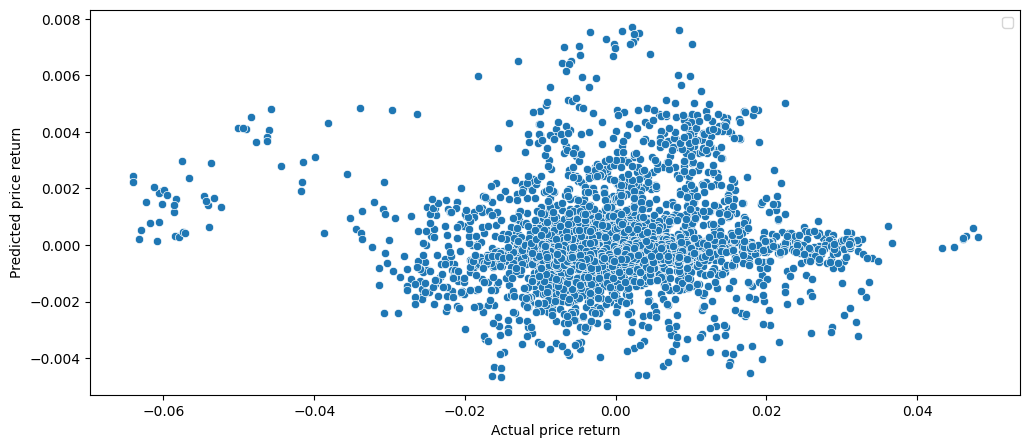

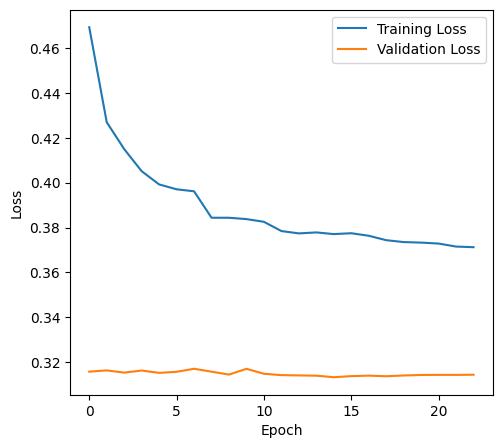

=== Cross-validation (validation folds) ===
mean CV MSE: 0.000239303131820634
mean CV MAE: 0.011119773611426353
mean CV DA: 0.48726573762614134
mean CV SR: -0.013555749275315037
mean CV R^2: -0.05569660663604736
mean CV Pearson correlation: 0.10535116493701935


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


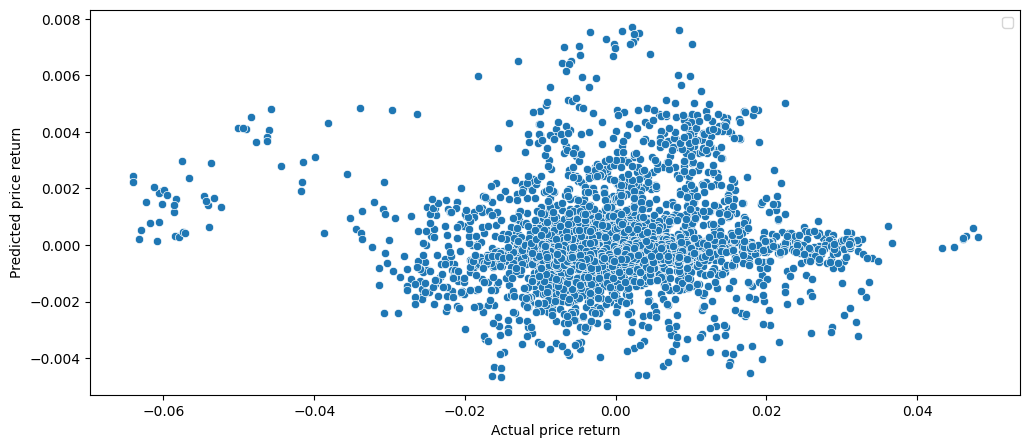

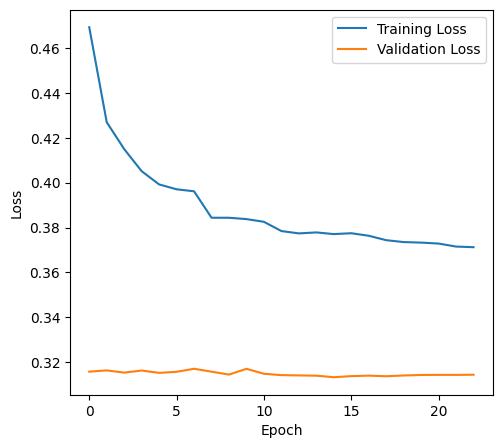

successfully saved training's output to gru_eth_scores_2_2.json


In [14]:
gru_2_scores, gru_2_history = train_price_prediction_model(X, y, ModelType.GRU, split, "gru_eth_scores_2_2.json", dropout=0.2, num_neurons=32, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.001, epochs=100, loss_funtion=LossFunction.HUBER)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 1.0600 - val_loss: 0.8589 - learning_rate: 0.0020
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.8961 - val_loss: 0.7819 - learning_rate: 0.0020
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.8518 - val_loss: 0.7742 - learning_rate: 0.0020
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8417 - val_loss: 0.7561 - learning_rate: 0.0020
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8285 - val_loss: 0.6656 - learning_rate: 0.0020
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7585 - val_loss: 0.6321 - learning_rate: 0.0020
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7021 - val_loss: 0.6017 - learning_rate: 0.0020
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7077 - val_loss: 0.5626 - learning_rate: 0.0020
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6952 - val_loss: 0.6929 - learning_rate: 0.0020
Epoch 10/1

/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


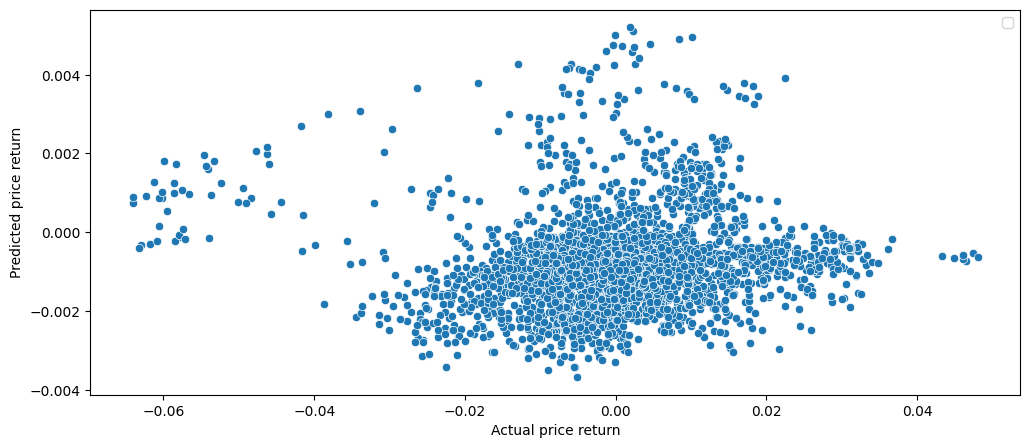

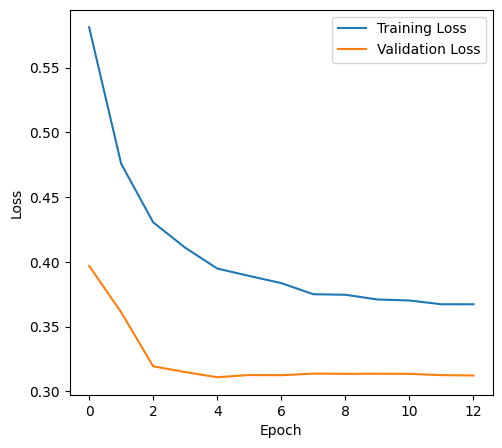

=== Cross-validation (validation folds) ===
mean CV MSE: 0.00023731205146759748
mean CV MAE: 0.011114092543721199
mean CV DA: 0.513022585295531
mean CV SR: 0.021520093699276644
mean CV R^2: -0.060766053199768064
mean CV Pearson correlation: 0.07258714735507965


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


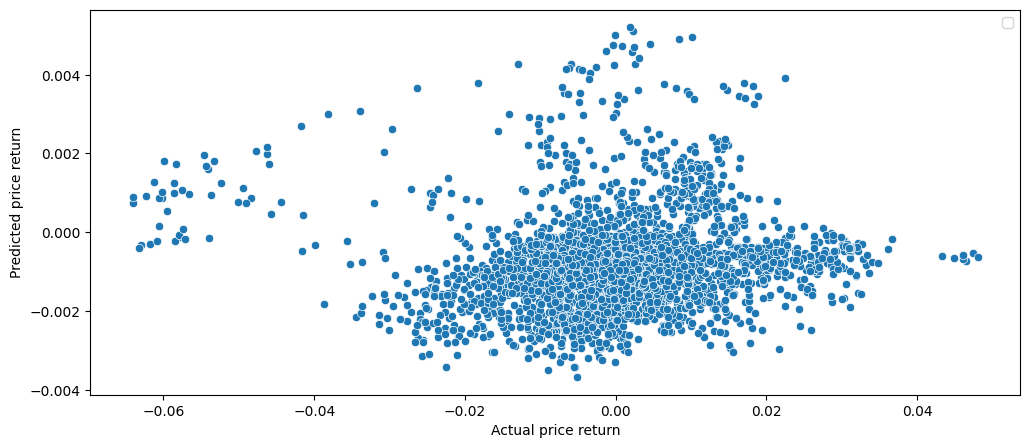

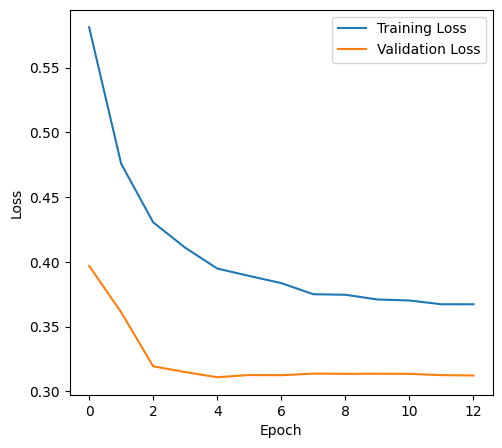

successfully saved training's output to gru_eth_scores_3_2.json


In [15]:
gru_3_scores, gru_3_history = train_price_prediction_model(X, y, ModelType.GRU, split, "gru_eth_scores_3_2.json", dropout=0.2, num_neurons=64, num_layers=1, batch_size=64, seq_length=64, learning_rate=0.002, epochs=100, loss_funtion=LossFunction.HUBER)

# ARIMA - trenowanie

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[CV fold 1] mse: 0.000293242 | mae: 0.0133038 | da: 0.519 | sr: -0.002


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[CV fold 2] mse: 0.000268687 | mae: 0.0137257 | da: 0.533 | sr: 0.035


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)


[CV fold 3] mse: 0.000821628 | mae: 0.0198671 | da: 0.444 | sr: -0.283


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)


[CV fold 4] mse: 0.000403955 | mae: 0.0152336 | da: 0.485 | sr: 0.003


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)


[CV fold 5] mse: 0.000323757 | mae: 0.014172 | da: 0.466 | sr: -0.025


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5min will be used.
  self._init_dates(dates, freq)


[FINAL TEST] mse: 0.000317477 | mae: 0.0132182 | da: 0.533 | sr: -0.001 | r_squared: -0.849 | corr: -0.024


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


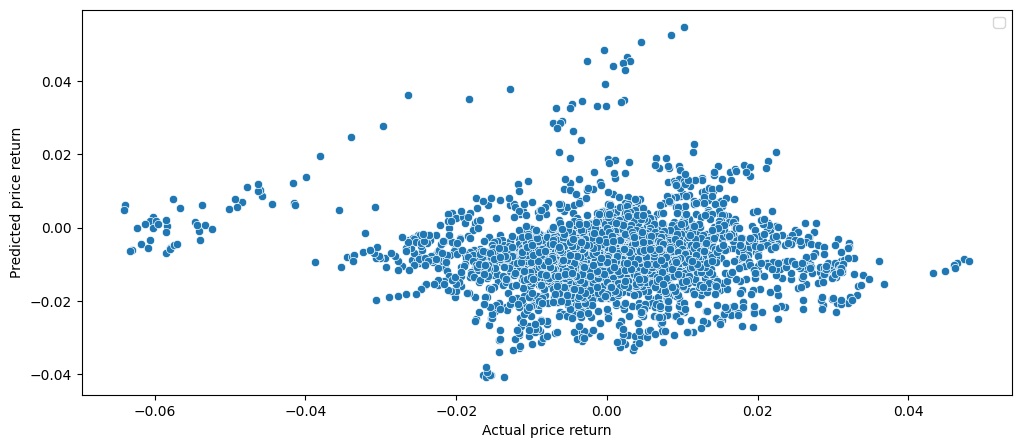

=== Cross-validation (validation folds) ===
mean CV MSE: 0.00042225383789558184
mean CV MAE: 0.015260448422313805
mean CV DA: 0.48936567164179107
mean CV SR: -0.054498924133571255
mean CV R^2: -0.9870403160720412
mean CV Pearson correlation: 0.023819266005865387


/content/drive/My Drive/magisterka/model_training/model_training_plots.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


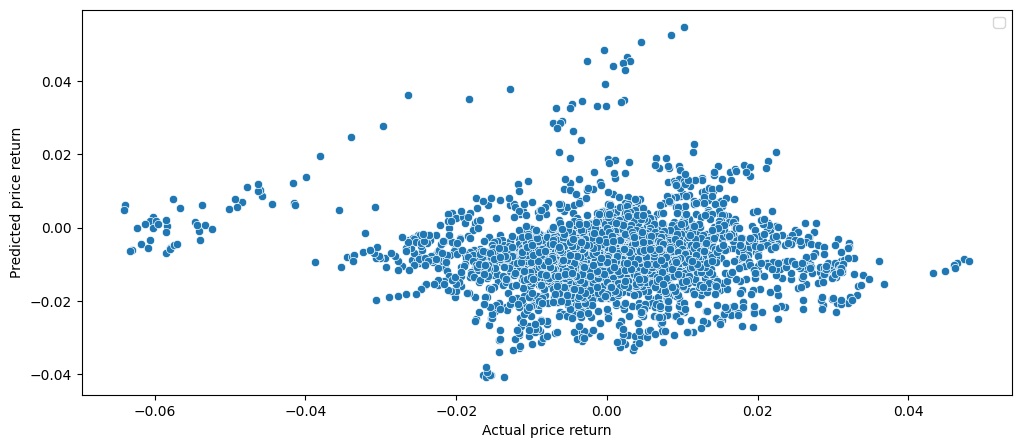

successfully saved training's output to arima_eth_scores_1_2.json


In [16]:
arima_scores, arima_history = train_price_prediction_model(X, y, ModelType.ARIMA, split, "arima_eth_scores_1_2.json", epochs=100)